In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data/Train_data.csv


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# 1. data loading
df = pd.read_csv("/kaggle/input/train-data/Train_data.csv", header=[0, 1])
df = df.dropna()

# mapping
target_col = df.columns[-1]
df['target'] = df[target_col].map({'Rarely': 1, 'Most of the Time': 2, 'Always': 3})

X = df.drop(columns=[target_col, 'target'])
X.columns = ['Q' + str(i+1) for i in range(X.shape[1])]
y = df['target'].values

# 2. scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. find best k
for k in [1, 3, 5, 7, 9, 11]:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X_scaled, y, cv=5)

    # MAE
    mae = np.mean(np.abs(y - y_pred))
    total_error = np.sum(np.abs(y - y_pred))

    print(f"\n KNN (k={k})")
    print(f"MAE: {mae:.4f}")
    print(f"Total Error (∑|ŷ − y|): {total_error}")
    
    cm = confusion_matrix(y, y_pred, labels=[1, 2, 3])
    print("Confusion Matrix:")
    print(cm)


/tmp/ipykernel_13/1849170780.py:16: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=[target_col, 'target'])



 KNN (k=1)
MAE: 0.5000
Total Error (∑|ŷ − y|): 86
Confusion Matrix:
[[43  6  6]
 [13 18 19]
 [10 16 41]]

 KNN (k=3)
MAE: 0.4942
Total Error (∑|ŷ − y|): 85
Confusion Matrix:
[[46  4  5]
 [19 16 15]
 [13 11 43]]

 KNN (k=5)
MAE: 0.4419
Total Error (∑|ŷ − y|): 76
Confusion Matrix:
[[46  7  2]
 [18 17 15]
 [11 10 46]]

 KNN (k=7)
MAE: 0.4477
Total Error (∑|ŷ − y|): 77
Confusion Matrix:
[[45  6  4]
 [12 19 19]
 [ 8 16 43]]

 KNN (k=9)
MAE: 0.4360
Total Error (∑|ŷ − y|): 75
Confusion Matrix:
[[45  5  5]
 [13 19 18]
 [ 7 15 45]]

 KNN (k=11)
MAE: 0.4477
Total Error (∑|ŷ − y|): 77
Confusion Matrix:
[[45  7  3]
 [13 16 21]
 [ 7 16 44]]


/tmp/ipykernel_13/1964157567.py:20: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=[target_col, 'target'])


KNN Classifier (k=9)
[Cross-Validated] MAE: 0.4360 | Total Error: 75
[Training]        MAE: 0.3256 | Total Error: 56


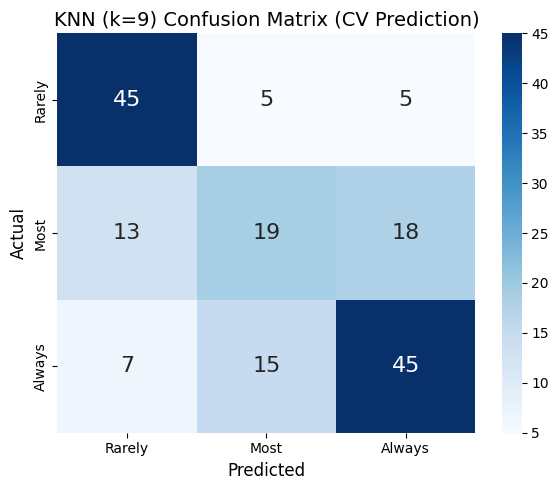


Classification Report (Cross-Validated Prediction):

              precision    recall  f1-score   support

      Rarely       0.69      0.82      0.75        55
        Most       0.49      0.38      0.43        50
      Always       0.66      0.67      0.67        67

    accuracy                           0.63       172
   macro avg       0.61      0.62      0.61       172
weighted avg       0.62      0.63      0.62       172



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, mean_absolute_error
)


df = pd.read_csv("/kaggle/input/train-data/Train_data.csv", header=[0, 1])
df = df.dropna()

target_col = df.columns[-1]
df['target'] = df[target_col].map({'Rarely': 1, 'Most of the Time': 2, 'Always': 3})

X = df.drop(columns=[target_col, 'target'])
X.columns = ['Q' + str(i+1) for i in range(X.shape[1])]
y = df['target'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KNN (k=9)
k = 9
knn = KNeighborsClassifier(n_neighbors=k)

# 4-1. Cross-validated prediction (Test error estimation)
y_cv_pred = cross_val_predict(knn, X_scaled, y, cv=5)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_total_error = np.sum(np.abs(y - y_cv_pred))

# 4-2. Training prediction (fit & predict on full data)
knn.fit(X_scaled, y)
y_train_pred = knn.predict(X_scaled)
train_mae = mean_absolute_error(y, y_train_pred)
train_total_error = np.sum(np.abs(y - y_train_pred))


print(f"KNN Classifier (k={k})")
print(f"[Cross-Validated] MAE: {cv_mae:.4f} | Total Error: {cv_total_error}")
print(f"[Training]        MAE: {train_mae:.4f} | Total Error: {train_total_error}")

# 6. Confusion Matrix (CV 기준)
cm = confusion_matrix(y, y_cv_pred, labels=[1, 2, 3])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Rarely", "Most", "Always"],
            yticklabels=["Rarely", "Most", "Always"],
            annot_kws={"size": 16})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("KNN (k=9) Confusion Matrix (CV Prediction)", fontsize=14)
plt.tight_layout()
plt.show()

# 7. Classification Report
print("\nClassification Report (Cross-Validated Prediction):\n")
print(classification_report(y, y_cv_pred, labels=[1, 2, 3],
                            target_names=["Rarely", "Most", "Always"]))


/tmp/ipykernel_13/655748343.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=[target_col, 'target'])


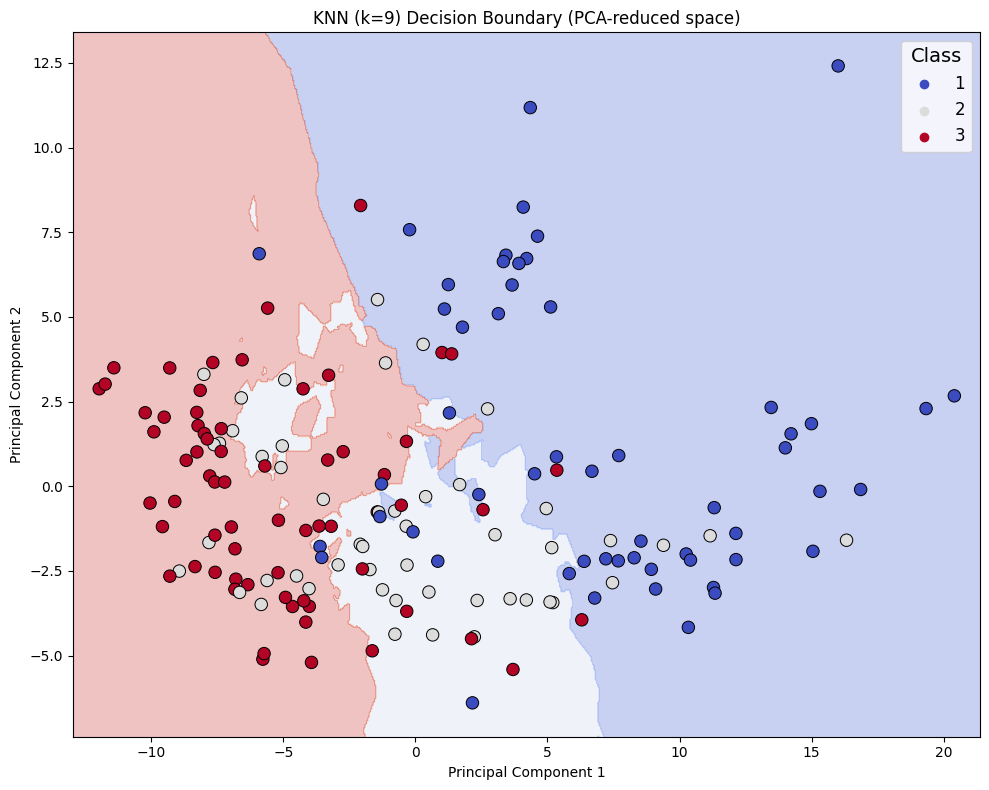

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("/kaggle/input/train-data/Train_data.csv", header=[0, 1])
df = df.dropna()
target_col = df.columns[-1]
df['target'] = df[target_col].map({'Rarely': 1, 'Most of the Time': 2, 'Always': 3})

X = df.drop(columns=[target_col, 'target'])
X.columns = ['Q' + str(i+1) for i in range(X.shape[1])]
y = df['target'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KNN  (k=9)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_pca, y)


h = .05  # grid의 step size
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm", s=80, edgecolor="k", legend='full')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN (k=9) Decision Boundary (PCA-reduced space)")
legend = plt.legend(title="Class", fontsize=12, title_fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_13/195607345.py:20: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=[target_col, 'target'])


SVM (RBF Kernel)
[Cross-Validated] MAE: 0.3488 | Total Error: 60
[Training]        MAE: 0.0581 | Total Error: 10


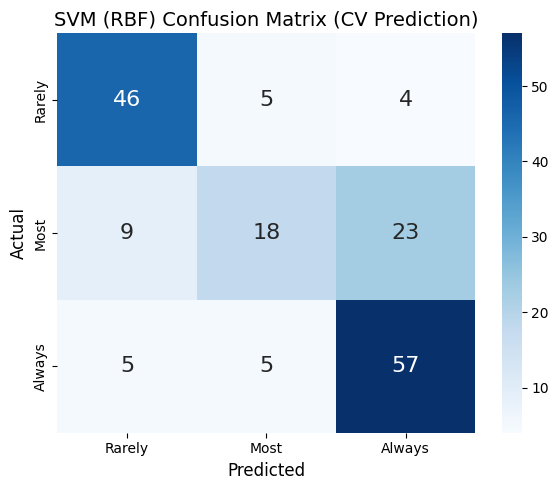


Classification Report (Cross-Validated Prediction):

              precision    recall  f1-score   support

      Rarely       0.77      0.84      0.80        55
        Most       0.64      0.36      0.46        50
      Always       0.68      0.85      0.75        67

    accuracy                           0.70       172
   macro avg       0.70      0.68      0.67       172
weighted avg       0.70      0.70      0.68       172



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC as SV
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    mean_absolute_error
)

df = pd.read_csv("/kaggle/input/train-data/Train_data.csv", header=[0, 1])
df = df.dropna()

target_col = df.columns[-1]
df['target'] = df[target_col].map({'Rarely': 1, 'Most of the Time': 2, 'Always': 3})

X = df.drop(columns=[target_col, 'target'])
X.columns = ['Q' + str(i+1) for i in range(X.shape[1])]
y = df['target'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. SVM with RBF kernel
svm_rbf = SV(kernel="rbf", C=1, gamma=0.01, decision_function_shape='ovo')

# 4-1. (Test Error)
y_cv_pred = cross_val_predict(svm_rbf, X_scaled, y, cv=5)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_total_error = np.sum(np.abs(y - y_cv_pred))

# 4-2. (Training Error)
svm_rbf.fit(X_scaled, y)
y_train_pred = svm_rbf.predict(X_scaled)
train_mae = mean_absolute_error(y, y_train_pred)
train_total_error = np.sum(np.abs(y - y_train_pred))

#
print("SVM (RBF Kernel)")
print(f"[Cross-Validated] MAE: {cv_mae:.4f} | Total Error: {cv_total_error}")
print(f"[Training]        MAE: {train_mae:.4f} | Total Error: {train_total_error}")

# 6. Confusion Matrix
conf_mat = confusion_matrix(y, y_cv_pred, labels=[1, 2, 3])
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Rarely", "Most", "Always"],
            yticklabels=["Rarely", "Most", "Always"],
            annot_kws={"size": 16})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("SVM (RBF) Confusion Matrix (CV Prediction)", fontsize=14)
plt.tight_layout()
plt.show()

# 7. Classification Report
print("\nClassification Report (Cross-Validated Prediction):\n")
print(classification_report(y, y_cv_pred, labels=[1, 2, 3],
                            target_names=["Rarely", "Most", "Always"]))


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.5, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.05, 0.1, 1],
    'kernel': ['rbf']
}

svm_rbf = SV()
grid = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X_scaled, y)

print("Best Params:", grid.best_params_)
y_pred = grid.predict(X_scaled)
print("MAE:", mean_absolute_error(y, y_pred))


Best Params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
MAE: 0.05813953488372093


/tmp/ipykernel_13/3227410590.py:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=[target_col, 'target'])


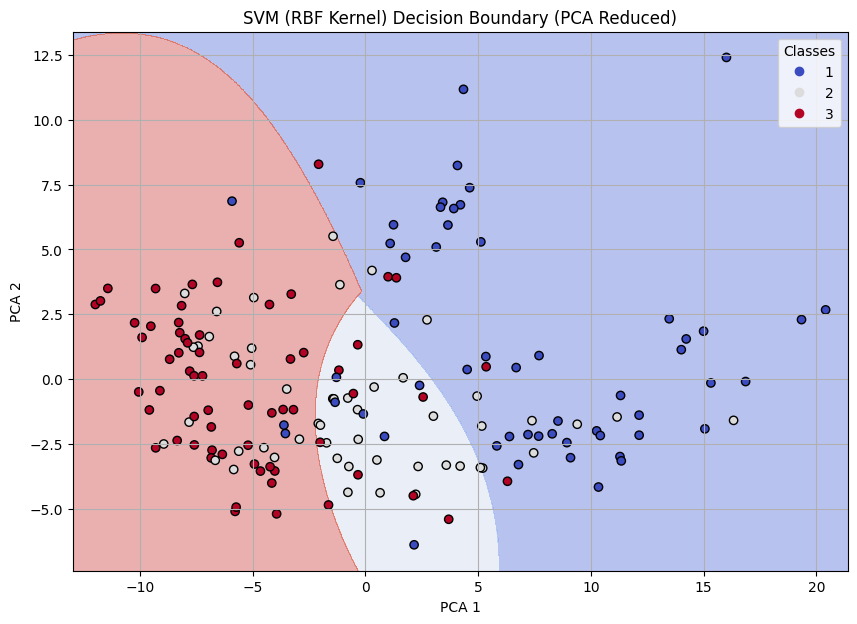

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("/kaggle/input/train-data/Train_data.csv", header=[0, 1])
df = df.dropna()

target_col = df.columns[-1]
df['target'] = df[target_col].map({
    'Rarely': 1,
    'Most of the Time': 2,
    'Always': 3
})

X = df.drop(columns=[target_col, 'target'])
X.columns = [f"Q{i+1}" for i in range(X.shape[1])]
y = df['target'].values

# 2.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. SVM 
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.01, decision_function_shape='ovo')
svm_rbf.fit(X_pca, y)

h = 0.02  
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. Plot
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("SVM (RBF Kernel) Decision Boundary (PCA Reduced)")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()
